In [3]:
import numpy
from numpy import *
import matplotlib.pyplot as plt
import pygments

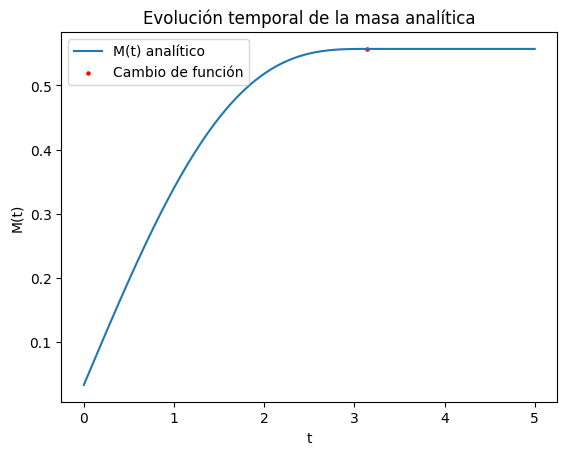

In [4]:
#EJERCICIO 3
'''INICIALIZO MI VECTOR DE MASAS Y CREO UN VECTOR DE TIEMPOS '''
M_a=[]
tiempo=linspace(0,5,5001)
'''RELLENO EL VECTOR DE MASAS TENIENDO EN CUENTA QUE f ESTÁ DEFINIDA A TROZOS '''
for i in range(0,len(tiempo)):
    if tiempo[i]<=pi:
        M_a.append(1/6*(tiempo[i]+sin(tiempo[i]))+1/30)
    else:
        M_a.append(pi/6+1/30)
'''LO PINTO '''
plt.plot(tiempo,M_a,label='M(t) analítico')
plt.scatter(pi,pi/6+1/30,color='red',s=5,label='Cambio de función')
plt.xlabel('t')
plt.ylabel('M(t)')
plt.legend()
plt.title('Evolución temporal de la masa analítica')
plt.show()

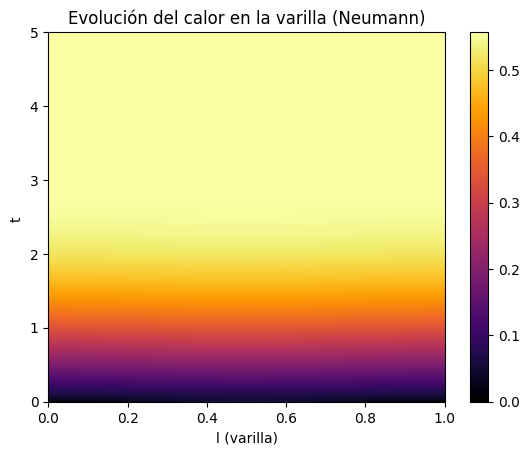

In [5]:
#EJERCICIO 5A
'''DECLARAMOS LAS VARIABLES GLOBALES Y ASIGNO SUS VALORES DENTRO DEL MAIN '''
x,t,dx,dt,T,l,_lambda,_theta,solucion_n,f_xt,CI=[],[],[],[],[],[],[],[],[],[],[]
'''ESTA FUNCION ME CALCULA LA MATRIZ DE MI SISTEMA '''
def matrix_neumann():
    '''CUANDO UTILIZO ESTAS VARIABLES DENTRO DE UNA FUNCION UTILIZO EL COMANDO global '''
    global x,t,dx,dt,T,l,_lambda,_theta
    '''CREO LA MATRIZ DEL SISTEMA CON CONDICIONES NEUMANN'''
    matriz=diag(ones(len(x))*(1+2*_lambda*_theta),0)+diag(ones(len(x)-1)*(-_lambda*_theta),1)+diag(ones(len(x)-1)*(-_lambda*_theta),-1)
    matriz[0,1]=matriz[0,1]-_lambda*_theta
    matriz[-1,-2]=matriz[-1,-2]-_lambda*_theta
    return matriz
'''DEFINO LA FUNCION QUE ME VA A CALULAR LA SOLUCION '''
def solucion_neumann(matriz):
    global x,t,dx,dt,T,l,_lambda,_theta,solucion_n,f_xt,CI
    ''' INICIALIZO MI MATRIZ SOLUCION'''
    solucion_n=zeros((len(t),len(x)))
    '''INTRODUZCO MI VECTOR DE DATOS INICIALES'''
    solucion_n[0,:]=CI
    '''EMPIEZO A ITERAR EL SISTEMA MATRICIAL'''
    for k in range (1,len(t)):
        bj=[]
        for j in range(0,len(x)):
            '''DISTINGO CASOS EN FUNCION DE SI ME ENCUENTRO EN LOS EXTREMOS, PUES b_j CAMBIA EN ELLOS'''
            if j==0:
                bj.append(2*_lambda*(1-_theta)*solucion_n[k-1,j+1]+solucion_n[k-1,j]*(1-2*_lambda*(1-_theta))+dt*(_theta*f_xt[k,j]+(1-_theta)*f_xt[k-1,j]))
            elif j==len(x)-1:
                bj.append(_lambda*(1-_theta)*(solucion_n[k-1,j-1]+solucion_n[k-1,j-1])+(1-2*_lambda*(1-_theta))*solucion_n[k-1,j]+dt*(_theta*f_xt[k,j]+(1-_theta)*f_xt[k-1,j]))
            else:    
                bj.append(_lambda*(1-_theta)*(solucion_n[k-1,j-1]+solucion_n[k-1,j+1])+solucion_n[k-1,j]*(1-2*_lambda*(1-_theta))+dt*(_theta*f_xt[k,j]+(1-_theta)*f_xt[k-1,j]))
        solucion_n[k,:]=linalg.solve(matriz,bj)


def main():
    global x,t,dx,dt,T,l,_lambda,_theta,solucion_n,f_xt,CI
    ''' INTRODUZCO LOS DATOS QUE SE ME INDICAN EN EL ENUNCIADO'''
    T=5
    l=1
    '''ESCOJO θ=1 Y LOS VALORES DE dt y dx, EXPLICACION EN EL .tex'''
    dt=0.001
    dx=0.001
    _theta=1
    _lambda=dt/(dx**2)
    t=arange(0,T+dt,dt)
    x=arange(0,l+dx,dx)
    '''INICIALIZO EL LA MATRIZ DE F '''
    f_xt=zeros((len(t),len(x)))
    '''LA CALCULO '''
    
    for k in range(0,len(t)):
        if t[k]>pi:
            f_xt[k,:]=zeros(len(x))
        else:
            for j in range(0,len(x)):
                f_xt[k,j]=(1+cos(t[k]))*x[j]*(1-x[j])           
        
    '''ESCRIBO EL VECTOR DE CONDICIONES INICIALES '''
    CI=(x**(2))*(1-x)**2
    '''LLAMO A LA FUNCION QUE ME CALULA LA MATRIZ DEL SISTEMA '''
    matriz=matrix_neumann()
    '''CALCULO LA SOLUCION '''
    solucion_neumann(matriz)
    '''LA PINTO '''
    plt.pcolormesh(x, t, solucion_n,cmap='inferno')
    plt.colorbar()
    plt.xlabel('l (varilla)')
    plt.ylabel('t ')
    plt.title('Evolución del calor en la varilla (Neumann)')
    plt.show()
if __name__ == '__main__':
	main()

  
    

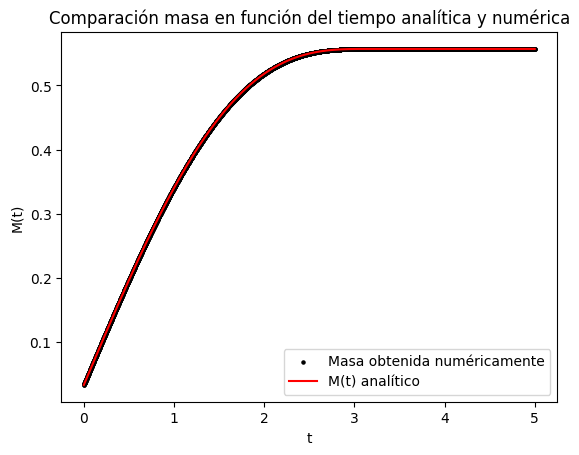

In [6]:
#EJERCICIO 5B
'''CREAMOS LA LISTA EN LA QUE VAMOS A ALMACENAR LA MASA EXPERIMENTAL '''
M_e=[]
'''INTEGRAMOS EL VECTOR SOLUCION A CADA TIEMPO PARA OBTENER LA MASA EXPERIMENTAL EN EL TIEMPO '''
for j in range(0,len(t)):
    M_e.append(trapz(solucion_n[j,:],x))
plt.scatter(t,M_e,label='Masa obtenida numéricamente',color='black',s=5)
plt.plot(tiempo,M_a,label='M(t) analítico',color='red')
plt.xlabel('t')
plt.ylabel('M(t)')
plt.title('Comparación masa en función del tiempo analítica y numérica')
plt.legend()
plt.show()


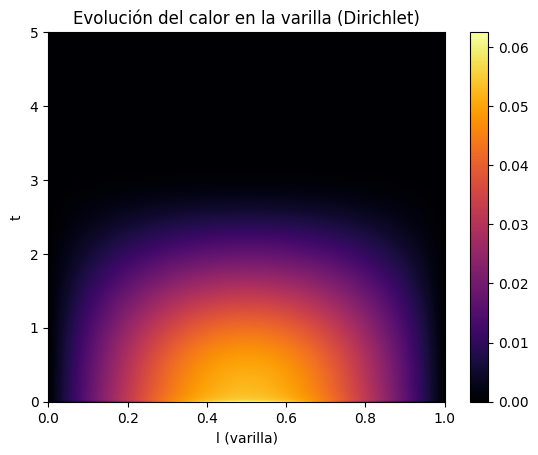

¿Es cierto que las soluciones verifican que u^N\geq u^D? Es True


In [7]:
#EJERCICIO 5C-1
'''INICIALIZO MI VECTOR SOLUCION DIRICHLET Y MIS CONDICIONES DE CONTORNO'''
solucion_d,CC0,CCN=[],[],[]
'''DEFINO LA FUNCION QUE ME CALCULA LA MATRIZ DEL SISTEMA DIRICHLET '''
def matrix_dirichlet():
    global x,t,dx,dt,T,l,_lambda,_theta
    matriz=diag(ones(len(x)-2)*(1+2*_lambda*_theta),0)+diag(ones(len(x)-3)*(-_lambda*_theta),1)+diag(ones(len(x)-3)*(-_lambda*_theta),-1)
    return matriz
'''DEFINO LA MATRIZ QUE ME DA LA SOLUCION '''
def solucion_dirichlet(matriz):
    global x,t,dx,dt,T,l,_lambda,_theta,solucion_d,f_xt,CI,CC0,CCN
    '''INTRODUZCO LAS CONDICIONES INICIALES Y DE CONTORNO '''
    solucion_d=zeros((len(t),len(x)))
    solucion_d[0,:]=CI
    solucion_d[:,0]=CC0
    solucion_d[:,len(x)-1]=CCN
    '''ITERO EL SISTEMA '''
    for k in range (1,len(t)):
        bj=[]
        for j in range(1,len(x)-1):
            bj.append(_lambda*(1-_theta)*(solucion_d[k-1,j+1]+solucion_d[k-1,j-1])+(1-2*_lambda*(1-_theta))*solucion_d[k-1,j]+dt*(_theta*f_xt[k,j]+(1-_theta)*f_xt[k-1,j]))
        solucion_d[k,1:len(x)-1]=linalg.solve(matriz,bj)


def main():
    global x,t,dx,dt,T,l,_lambda,_theta,solucion_d,f_xt,CI,CC0,CCN
    '''LLAMO A LAS FUNCIONES Y CALCULO LAS SOLUCIONES '''
    CC0=zeros(len(t))
    CCN=zeros(len(t))
    matriz=matrix_dirichlet()
    solucion_dirichlet(matriz)
    '''LAS PINTO '''
    plt.pcolormesh(x, t, solucion_d,cmap='inferno')
    plt.colorbar()
    plt.xlabel('l (varilla)')
    plt.ylabel('t')
    plt.title('Evolución del calor en la varilla (Dirichlet)')
    plt.show()
    '''PARA COMPROBAR QUE SE VERIFICA QUE  $u^N\geq u^D$'''
    v=solucion_n>=solucion_d
    print('¿Es cierto que las soluciones verifican que u^N\geq u^D? Es '+str(v.all and True))
if __name__ == '__main__':
	main()
  
    

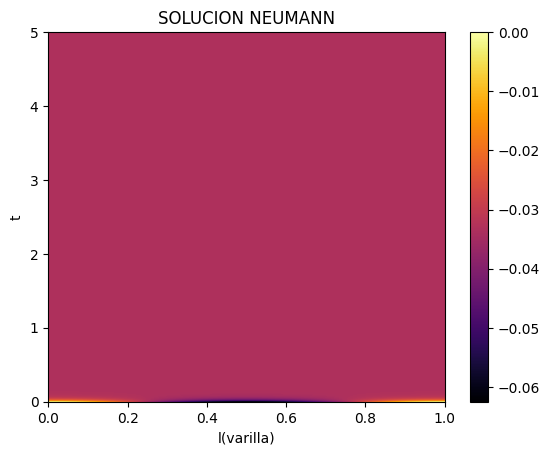

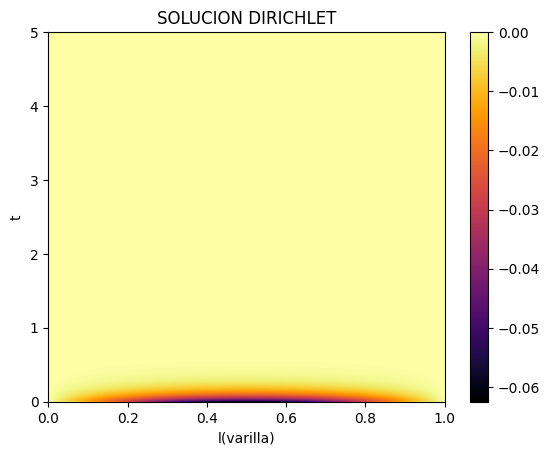

¿Es cierto que se deja de cumplir que la solucion Neumann es mayor que Dirichlet? Es True


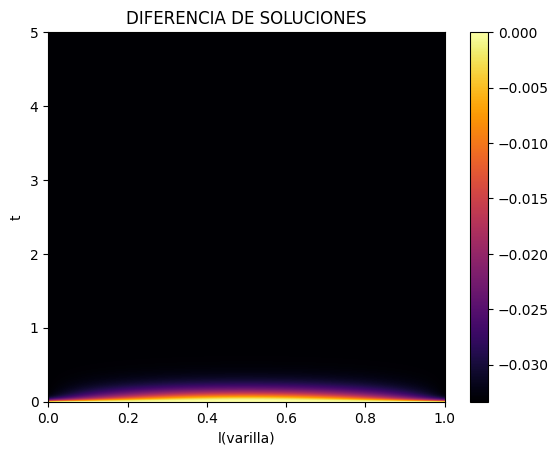

In [8]:
#EJERCICIO 5C-2
'''REDEFINO EL VECTOR DE CONDICIONES INICIALES '''
CI=-x**2*(1-x)**2
'''IMPONGO F=0 '''
f_xt=zeros((len(t),len(x)))
'''SACO LAS SOLUCIONES DIRICHLET Y NEUMANN '''
matriz1=matrix_dirichlet()
solucion_dirichlet(matriz1)
matriz2=matrix_neumann()
solucion_neumann(matriz2)
'''PINTO LA SOLUCION NEUMANN '''
plt.pcolormesh(x,t,solucion_n,cmap='inferno')
plt.xlabel('l(varilla)')
plt.ylabel('t')
plt.title('SOLUCION NEUMANN')
plt.colorbar()
plt.show()
'''PINTO LA SOLUCION DIRICHLET '''
plt.pcolormesh(x,t,solucion_d,cmap='inferno')
plt.xlabel('l(varilla)')
plt.ylabel('t')
plt.title('SOLUCION DIRICHLET')
plt.colorbar()
plt.show()
'''DEFINO LA MATRIZ QUE ME COMPARA UNO A UNO LOS ELEMENTOS DE LAS SOLUCIONES '''
v=solucion_d>solucion_n
'''PRINTEO SI EFECTIVAMENTE EXISTE ALGUN ELEMENTO DE LA MATRIZ v QUE SEA VERDADERO '''
print('¿Es cierto que se deja de cumplir que la solucion Neumann es mayor que Dirichlet? Es ' + str(v.any() and True))
'''PARA TERMINAR PINTAMOS LA SOLUCIÓN DIFERENCIA (RAZONAMIENTO DE LA MISMA EN EL pdf) '''
plt.pcolormesh(x,t,solucion_n-solucion_d,cmap='inferno')
plt.xlabel('l(varilla)')
plt.ylabel('t')
plt.colorbar()
plt.title('DIFERENCIA DE SOLUCIONES')
plt.show()



In [10]:
v[1:,:].any() and True


True